In [11]:
import numpy as np 
import pandas as pd 
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
%matplotlib notebook

import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


from lime.lime_text import LimeTextExplainer
from tqdm import tqdm
import string
import random
import operator
import seaborn as sns
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from statistics import *
import concurrent.futures
import time
import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
import warnings
import nltk

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 

import tensorflow as tf
tf.compat.v1.set_random_seed(2)

import warnings
warnings.filterwarnings("ignore")

In [12]:
#list of data that we have in the workspace

print(os.listdir("../dataset"))

['USvideos.csv', 'CAvideos.csv', 'GBvideos.csv', 'CA_category_id.json']


In [13]:
# countries that use English as an official language
british_youtube = pd.read_csv("../dataset/GBvideos.csv")
canadian_youtube = pd.read_csv("../dataset/CAvideos.csv")
us_youtube = pd.read_csv("../dataset/USvideos.csv")


First of all, let's take a look at data :)

In [14]:
canadian_youtube.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. Beyoncé i...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  I know it's been a while since we did this sho...  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

In [15]:
british_youtube.head()

video_id trending_date  \
0  Jw1Y-zhQURU      17.14.11   
1  3s1rvMFUweQ      17.14.11   
2  n1WpP7iowLc      17.14.11   
3  PUTEiSjKwJU      17.14.11   
4  rHwDegptbI4      17.14.11   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: …Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyoncé   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id              publish_time  \
0                  John Lewis           26  2017-11-10T07:38:29.000Z   
1         Saturday Night Live           24  2017-11-12T06:24:44.000Z   
2                  EminemVEVO           10  2017-11-10T17:00:03.000Z   
3  Salford City Football Club           17  2017-11-13T02:30:38.000Z   
4            Cute Girl Videos           25  2017-11-13T01:45:13.000Z   

                                                tags     views   likes  \
0  christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   25561   
2  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787420   
3  Salford City FC|"Salford City"|"Salford"|"Clas...     27833     193   
4                                             [none]      9815      30   

   dislikes  comment_count                                  thumbnail_link  \
0     10247           9479  https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg   
1      2294           2757  https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg   
2     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
3        12             37  https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg   
4         2             30  https://i.ytimg.com/vi/rHwDegptbI4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Click here to continue the story and make your...  
1  Musical guest Taylor Swift performs …Ready for...  
2  Eminem's new track Walk on Water ft. Beyoncé i...  
3  Salford drew 4-4 against the Class of 92 and F...  
4  Dashcam captures truck's near miss with child ...

In [16]:
us_youtube.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [17]:
#combine tables
three_countries=pd.concat([canadian_youtube, british_youtube,us_youtube])
three_countries.shape


(120746, 16)

In [18]:
#Check duplicate. It is always good to check whether there are some duplicates in dataset!
three_countries.video_id.value_counts()[:10]

8h--kFui1JA    70
VYOjWnS4cMY    69
vjSohj-Iclc    65
l884wKofd54    64
zxwfDlhJIpw    64
UUkn-enk2RU    64
5GHXEGz3PJg    63
CX11yw6YL1w    63
ffxKSjUwKdU    61
pFc6I0rgmgY    61
Name: video_id, dtype: int64

In [19]:
#remove duplicate
three_countries= three_countries.drop_duplicates(['video_id'], keep='first')


In [20]:
three_countries.video_id.value_counts()[:10]

dkH-Nu23KEo    1
S2l1j-zkTF8    1
NUsz_knew28    1
rzrk85q7ZWE    1
lLugLmQK6_w    1
8MeBSUxfauQ    1
Dan2YMDCpms    1
xBht9TG7ySw    1
t25ETTRULy0    1
mnLIPjYS__o    1
Name: video_id, dtype: int64

In [21]:
#need to be decoded 
three_countries.category_id.head()

0    10
1    23
2    23
3    24
4    10
Name: category_id, dtype: int64

In [22]:
import json

def category_name(path):
    with open(path) as json_file:  
        data = json.load(json_file)
    category_info_list=[]
    for row in data['items']:
        id_info=row['id']
        category_name=row['snippet']['title']
        categoty_info=(id_info ,category_name)
        category_info_list.append(categoty_info)
    return(dict(category_info_list))
        
    

In [23]:
category_name("../dataset/CA_category_id.json")

{'1': 'Film & Animation',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '2': 'Autos & Vehicles',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [24]:
global str
category_list=category_name("../dataset/CA_category_id.json")
category_names=[]
for i in three_countries.category_id:
    category_name=category_list.get(str(i))
    category_names.append(category_name)

three_countries['category_names']=category_names

In [25]:
#now, we have category name :)
three_countries['category_names'].head()

0            Music
1           Comedy
2           Comedy
3    Entertainment
4            Music
Name: category_names, dtype: object

In [26]:
three_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30318 entries, 0 to 40766
Data columns (total 17 columns):
video_id                  30318 non-null object
trending_date             30318 non-null object
title                     30318 non-null object
channel_title             30318 non-null object
category_id               30318 non-null int64
publish_time              30318 non-null object
tags                      30318 non-null object
views                     30318 non-null int64
likes                     30318 non-null int64
dislikes                  30318 non-null int64
comment_count             30318 non-null int64
thumbnail_link            30318 non-null object
comments_disabled         30318 non-null bool
ratings_disabled          30318 non-null bool
video_error_or_removed    30318 non-null bool
description               29227 non-null object
category_names            30251 non-null object
dtypes: bool(3), int64(5), object(9)
memory usage: 3.6+ MB


In [27]:
! pip install pandas-profiling

<IPython.core.display.Javascript object>


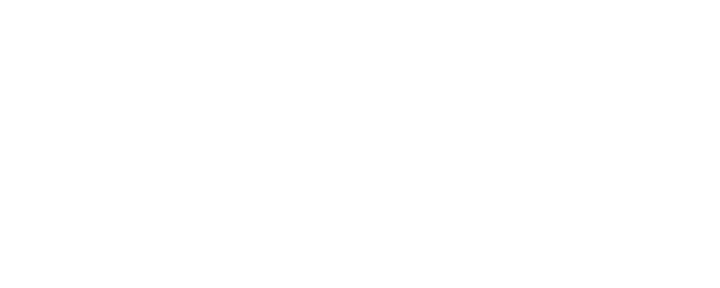

<IPython.core.display.Javascript object>


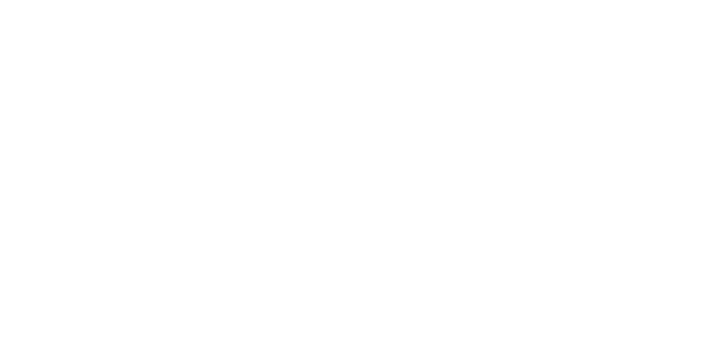

<IPython.core.display.Javascript object>


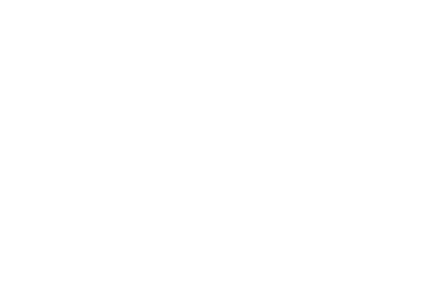

<IPython.core.display.Javascript object>


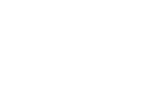

<IPython.core.display.Javascript object>


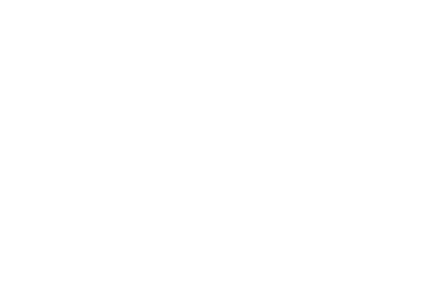

<IPython.core.display.Javascript object>


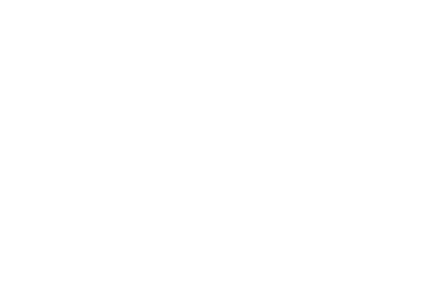

<IPython.core.display.Javascript object>


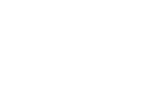

<IPython.core.display.Javascript object>


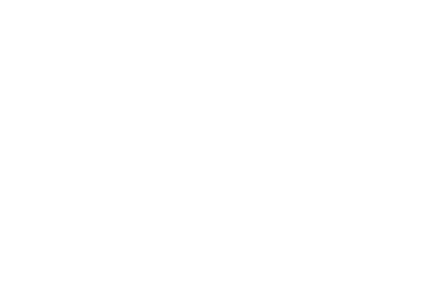

<IPython.core.display.Javascript object>


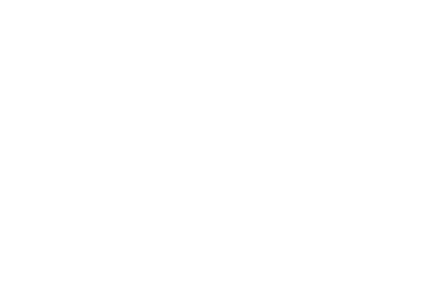

<IPython.core.display.Javascript object>


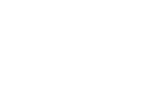

<IPython.core.display.Javascript object>


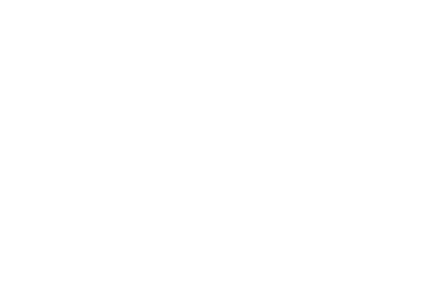

<IPython.core.display.Javascript object>


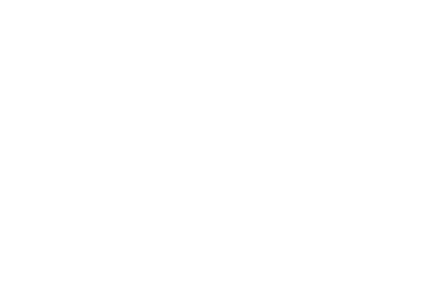

<IPython.core.display.Javascript object>


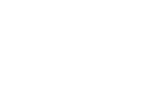

<IPython.core.display.Javascript object>


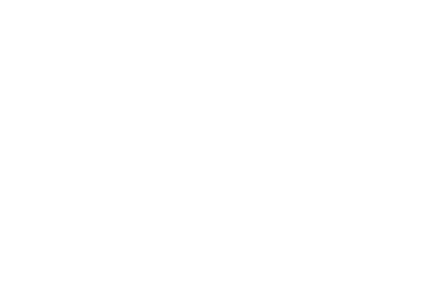

<IPython.core.display.Javascript object>


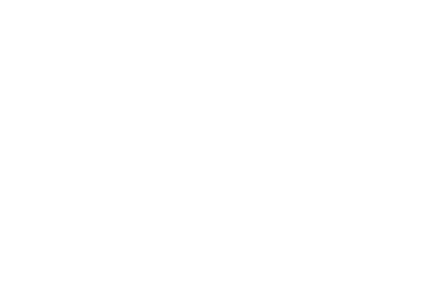

<IPython.core.display.Javascript object>


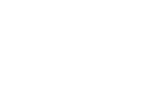

<IPython.core.display.Javascript object>


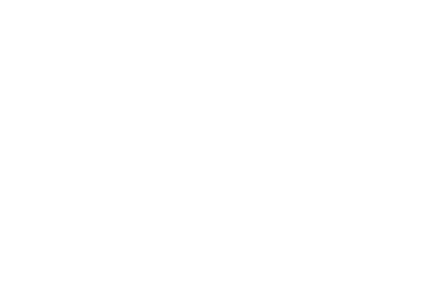

<IPython.core.display.Javascript object>


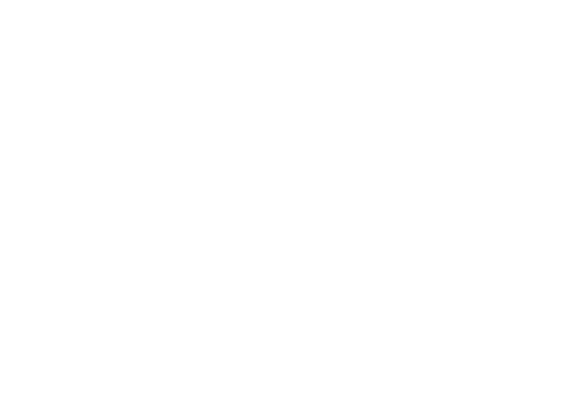

<IPython.core.display.Javascript object>


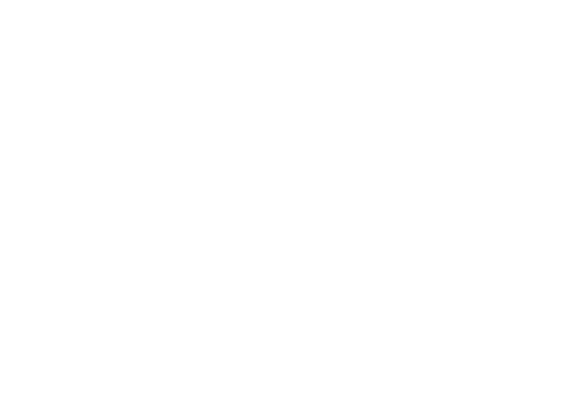

<IPython.core.display.Javascript object>


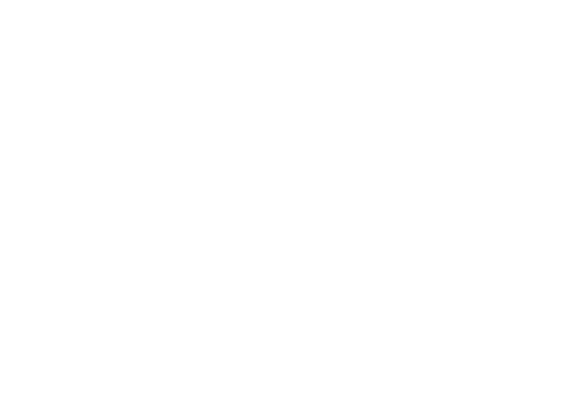

<IPython.core.display.Javascript object>


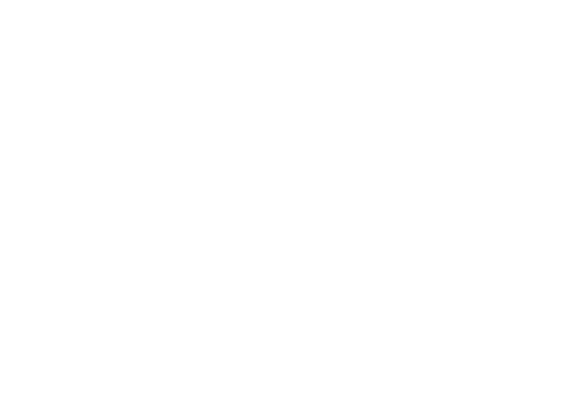

In [83]:
# #give you a report of distribution of data/correlation
# import pandas_profiling as pp

# pp.ProfileReport(three_countries[['views','likes','dislikes','comment_count']])

# **Finding Outlier Youtube Video**

The dataset already includes trending Youtube video. However, I am interested in taking a look at popular ones among trending videos. I will use number of view as the variable to define the popularity of video. In the analysis, a popular video means the number of view for the video is more than 1.5 interquartile ranges (IQRs) above the third quartile. 

In [29]:

Q1 = three_countries.views.quantile(0.25)
Q3 = three_countries.views.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

popular_videos=three_countries.loc[three_countries.views > (Q3 + 1.5 * IQR)]

three_countries['popular']=0
three_countries.loc[three_countries.views > (Q3 + 1.5 * IQR),'popular']=1

three_countries['popular'].value_counts()

387148.5


0    27452
1     2866
Name: popular, dtype: int64

In [30]:
#make a variable that tells ratio of like and dislike
three_countries['like_percentage']=(three_countries['likes']/(three_countries['likes']+three_countries['dislikes'])*100)
#date column as datatime datatype
three_countries["publish_time"] = pd.to_datetime(three_countries["publish_time"])

In [82]:
#top 20 channels by the mean of views

# fig = plt.figure(figsize=(15, 10))
# three_countries.groupby('channel_title').mean().sort_values(by=['views'], ascending=False)[:20].views.sort_values(ascending=True).plot(kind='barh',colormap='winter',fontsize=20)


<br> <br>

In [32]:
#among popular videos, here are top 10 like percentage video. All of them are k-pop stars MV lol 

three_countries.loc[three_countries.popular==1].sort_values(by=['like_percentage'], ascending=False)[:10]

video_id trending_date  \
32215  PMEkmiQP5bg      18.02.05   
14021  v9ea5VDQfXg      18.25.01   
3245   c5_LROaHGtw      17.30.11   
16323  3-FXW0CW_8o      18.05.02   
20788  -7tSTUR7FG0      18.28.02   
13987  J41qe-TM1DY      18.24.01   
37457  nQySbNGu4g0      18.28.05   
9622   Q48VduIflPk      18.01.01   
14623  floMqK_yHf8      18.28.01   
28243  VM-g_bkFdzo      18.07.04   

                                                   title channel_title  \
32215                                     G.C.F in Osaka     BANGTANTV   
14021   JONGHYUN 종현 '우린 봄이 오기 전에 (Before Our Spring)' MV        SMTOWN   
3245        [EPISODE] BTS (방탄소년단) 'MIC Drop' MV Shooting     BANGTANTV   
16323  [BANGTAN BOMB] V&Jungkook Singing at standby time     BANGTANTV   
20788                  NCT U 엔시티 유 'BOSS' Dance Practice        SMTOWN   
13987                    JONGHYUN 종현 '빛이 나 (Shinin’)' MV        SMTOWN   
37457  [CHOREOGRAPHY] BTS (방탄소년단) 'FAKE LOVE' Dance P...     BANGTANTV   
9622   [STATION] SMTOWN 'Dear My Family (Live Concert...        SMTOWN   
14623  [BANGTAN BOMB] 'MIC Drop' Special Stage (BTS f...     BANGTANTV   
28243                    [STATION] TEN 텐 'New Heroes' MV        SMTOWN   

       category_id              publish_time  \
32215           10 2018-04-30 13:03:49+00:00   
14021           10 2018-01-24 03:00:02+00:00   
3245            10 2017-11-29 10:00:03+00:00   
16323           10 2018-02-04 06:00:07+00:00   
20788           10 2018-02-27 12:00:00+00:00   
13987           10 2018-01-23 04:00:00+00:00   
37457           10 2018-05-27 11:00:03+00:00   
9622            10 2017-12-29 09:00:02+00:00   
14623           10 2018-01-27 05:00:00+00:00   
28243           10 2018-04-06 09:00:05+00:00   

                                                    tags    views   likes  \
32215  방탄소년단|"BTS"|"BANGTAN"|"HIPHOP"|"랩몬스터"|"RapMons...  2942269  688754   
14021  JONGHYUN|"종현"|"샤이니"|"SHINee"|"우린 봄이 오기 전에"|"Be...  1498763  310738   
3245   방탄소년단|"BTS"|"BANGTAN"|"HIPHOP"|"랩몬스터"|"RapMons...  1447420  245075   
16323  방탄소년단|"BTS"|"BANGTAN"|"HIPHOP"|"랩몬스터"|"RapMons...  1596081  345195   
20788  NCT|"NCT 2018"|"TAEYONG"|"JAEHYUN"|"JUNGWOO"|"...  1092530  152536   
13987  JONGHYUN|"종현"|"SHINee"|"샤이니"|"빛이 나"|"Shinin'"|...  4285299  827162   
37457  방탄소년단|"BTS"|"BANGTAN"|"HIPHOP"|"랩몬스터"|"RapMons...  4196932  845029   
9622   SM STATION|"SMTOWN"|"Dear My Family"|"SM Enter...  2332110  346819   
14623  방탄소년단|"BTS"|"BANGTAN"|"HIPHOP"|"랩몬스터"|"RapMons...  1835185  342655   
28243  NCT|"텐"|"TEN"|"SM STATION"|"슴스테"|"New Heroes"|...  1113267  206212   

       dislikes  comment_count  \
32215       687          61516   
14021       332          26463   
3245        354          12157   
16323       702          40251   
20788       338           8272   
13987      1897         104986   
37457      1948          56047   
9622        803          22920   
14623       807          25545   
28243       507          19119   

                                       thumbnail_link  comments_disabled  \
32215  https://i.ytimg.com/vi/PMEkmiQP5bg/default.jpg              False   
14021  https://i.ytimg.com/vi/v9ea5VDQfXg/default.jpg              False   
3245   https://i.ytimg.com/vi/c5_LROaHGtw/default.jpg              False   
16323  https://i.ytimg.com/vi/3-FXW0CW_8o/default.jpg              False   
20788  https://i.ytimg.com/vi/-7tSTUR7FG0/default.jpg              False   
13987  https://i.ytimg.com/vi/J41qe-TM1DY/default.jpg              False   
37457  https://i.ytimg.com/vi/nQySbNGu4g0/default.jpg              False   
9622   https://i.ytimg.com/vi/Q48VduIflPk/default.jpg              False   
14623  https://i.ytimg.com/vi/floMqK_yHf8/default.jpg              False   
28243  https://i.ytimg.com/vi/VM-g_bkFdzo/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
32215             False                   False   
14021             False                   False   
3245              False                   False   
16323

<br> <br>

In [33]:
#among popular videos, here are top 10 dislike percentage video. 

three_countries.loc[three_countries.popular==1].sort_values(by=['like_percentage'], ascending=True)[:10]

video_id trending_date  \
18945  V5cOvyDpWfM      18.19.02   
2406   qu-biRtYEcU      17.26.11   
19425  Aqx41JrNTSw      18.21.02   
16194  C-rumHvmqCA      18.05.02   
24665  ivYp5NMaUY4      18.19.03   
9994   xZZyckBhCmY      18.03.01   
10297  zhUmo88gzwg      18.04.01   
19173  CMA2iF6RuXk      18.20.02   
16481  wJJqGh2HLM8      18.06.02   
12267  eT9eWtb7C4c      18.16.01   

                                                   title  \
18945  Fergie Performs The U.S. National Anthem / 201...   
2406                                 Volar - Jaime Ciero   
19425  김보름 진심으로 사과드립니다..결국 눈물로 사죄 (기자회견 풀영상) / SBS / ...   
16194          T-Mobile | #LittleOnes | 2018 Big Game Ad   
24665          Выборы-2018. Подсчет голосов. Прямой эфир   
9994   REUPLOAD Logan Paul Vlogs   We found a dead bo...   
10297  Logan Paul deleted Vlog video - Suicide forest...   
19173    Fergie's national anthem draws criticism | ESPN   
16481         Hope Detector | Hyundai NFL Super Bowl LII   
12267  Show Dogs | Official Trailer | In Theaters May 18   

                              channel_title  category_id  \
18945                        MLG Highlights           17   
2406                             paulitaale           10   
19425                                SBS 뉴스           25   
16194                              T-Mobile           24   
24665  Политика сегодня: Россия США Украина           25   
9994                           ShadeBlade02           23   
10297                          Enima Videos           24   
19173                                  ESPN           17   
16481                            HyundaiUSA            2   
12267                       Open Road Films           24   

                   publish_time  \
18945 2018-02-19 01:37:11+00:00   
2406  2011-12-26 02:50:18+00:00   
19425 2018-02-20 09:33:31+00:00   
16194 2018-02-05 02:12:26+00:00   
24665 2018-03-19 00:53:55+00:00   
9994  2018-01-02 04:08:05+00:00   
10297 2018-01-02 23:57:52+00:00   
19173 2018-02-19 12:42:36+00:00   
16481 2018-02-04 23:31:40+00:00   
12267 2018-01-11 23:10:38+00:00   

                                                    tags    views  likes  \
18945  mlg highlights|"mlg"|"basketball"|"highlights"...  1211176   3553   
2406   Jaime Ciero|"compositor"|"cantautor Chileno Me...  1213682    757   
19425  뉴스|"NEWS"|"news"|"SBS"|"sbs"|"SBS NEWS"|"SBS8N...  1337500   2200   
16194  best super bowl ads|"best superbowl ads"|"best...  1687984   1700   
24665  соловьев|"владимир"|"политика россии"|"политик...  1524665  11331   
9994                              Logan Paul|"Jake Paul"  2299882   9382   
10297  logan|"paul"|"logan paul"|"jake paul"|"pewdiep...  1231083   2699   
19173  espn|"espn live"|"fergie"|"national"|"anthem"|...  2762839  14362   
16481  Hyundai|"Hyundai Super Bowl"|"Hyundai surprise...  1946367    670   
12267  show dogs|"movie"|"dogs"|"talking dogs"|"will ...  1482178     54   

       dislikes  comment_count  \
18945     18200           8338   
2406       3275           1495   
19425      8092          14673   
16194      5735              0   
24665     37610           2971   
9994      30072           5709   
10297      8482           1006   
19173     37877          21507   
16481      1679            241   
12267        86             37   

                                       thumbnail_link  comments_disabled  \
18945  https://i.ytimg.com/vi/V5cOvyDpWfM/default.jpg              False   
2406   https://i.ytimg.com/vi/qu-biRtYEcU/default.jpg              False   
19425  https://i.ytimg.com/vi/Aqx41JrNTSw/default.jpg              False   
16194  https://i.ytimg.com/vi/C-rumHvmqCA/default.jpg               True   
24665  https://i.ytimg.com/vi/ivYp5NMaUY4/default.jpg              False   
9994   https://i.ytimg.com/vi/xZZyckBhCmY/default.jpg              False   
10297  https://i.ytimg.com/vi/zhUmo88gzwg/default.jpg              False   
19173  https://i.ytimg.com/vi/CMA2iF6RuXk/default.jpg              False   
16481  ht

<br><br>

In [34]:
#simple example 

nlp = spacy.load("en_core_web_sm")
doc = nlp(u"An apple is not a banana")
for token in doc:
    print(token.text)

An
apple
is
not
a
banana



<table>
<tr><td>0 </td><td> 1 </td> <td>2 </td><td>3 </td><td>4 </td> <td>5 </td></tr>
<tr><td>An </td> <td>  apple</td><td>  is</td><td>not </td> <td>  a</td><td> banana</td></tr>
</table>

In [35]:
punctuations = string.punctuation
stopwords = list(STOP_WORDS)
parser = English()

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens


tqdm.pandas()

normal = three_countries["title"][three_countries["popular"] == 0].progress_apply(spacy_tokenizer)
popular = three_countries["title"][three_countries["popular"] == 1].progress_apply(spacy_tokenizer)

100%|██████████| 2866/2866 [00:00<00:00, 3690.11it/s]


In [36]:
#tokenize words by popularity 

def word_generator(text):
    word = list(text.split())
    return word
def bigram_generator(text):
    bgram = list(nltk.bigrams(text.split()))
    bgram = [' '.join((a, b)) for (a, b) in bgram]
    return bgram
def trigram_generator(text):
    tgram = list(nltk.trigrams(text.split()))
    tgram = [' '.join((a, b, c)) for (a, b, c) in tgram]
    return tgram


normal_words = normal.progress_apply(word_generator)
popular_words = popular.progress_apply(word_generator)
normal_bigrams = normal.progress_apply(bigram_generator)
popular_bigrams = popular.progress_apply(bigram_generator)
normal_trigrams = normal.progress_apply(trigram_generator)
popular_trigrams = popular.progress_apply(trigram_generator)

100%|██████████| 2866/2866 [00:00<00:00, 106805.70it/s]


In [37]:
#function that makes a pretty word frequency plot

def word_plot(words,my_color):
    slist =[]
    for x in words:
        slist.extend(x)
    fig = plt.figure(figsize=(15, 10))
    pd.Series(slist).value_counts()[:20].sort_values(ascending=True).plot(kind='barh',fontsize=20, color=my_color)
    plt.show()


In [41]:
txt1 = ['I like banana', 'An apple is not a banana', 'banana banana oh banana']
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(txt1)
txt_transformed = txt_fitted.transform(txt1)
print ("The text: ", txt1)

The text:  ['I like banana', 'An apple is not a banana', 'banana banana oh banana']


In [42]:
tf.vocabulary_

{'an': 0, 'apple': 1, 'banana': 2, 'is': 3, 'like': 4, 'not': 5, 'oh': 6}

In [43]:
idf = tf.idf_
print(dict(zip(txt_fitted.get_feature_names(), idf)))
print("\nThe token 'banana' appears 5 times but it is also in all documents, so its idf is the lowest")

{'oh': 2.09861228866811, 'is': 2.09861228866811, 'banana': 1.0, 'apple': 2.09861228866811, 'not': 2.09861228866811, 'like': 2.09861228866811, 'an': 2.09861228866811}

The token 'banana' appears 5 times but it is also in all documents, so its idf is the lowest


In [44]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(three_countries.title)
word_features = word_vectorizer.transform(three_countries.title)

classifier_popular = LogisticRegression(C=0.1, solver='sag')
classifier_popular.fit(word_features ,three_countries.popular)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
names=['normal','popular']

In [46]:
c_tf = make_pipeline( word_vectorizer,classifier_popular)
explainer_tf = LimeTextExplainer(class_names=names)

exp = explainer_tf.explain_instance(three_countries.title.iloc[10], c_tf.predict_proba, num_features=4, top_labels=1)
exp.show_in_notebook(text=three_countries.title.iloc[10])


In [47]:
exp = explainer_tf.explain_instance(three_countries.title.iloc[4], c_tf.predict_proba, num_features=5, top_labels=1)
exp.show_in_notebook(text=three_countries.title.iloc[4])

In [57]:
exp = explainer_tf.explain_instance(three_countries.title.iloc[10035], c_tf.predict_proba, num_features=5, top_labels=1)
exp.show_in_notebook(text=three_countries.title.iloc[10035])

In [ ]:
! pip install plotly==3.10.0

In [ ]:
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.tools as tls


labels = list(three_countries.category_names.value_counts().index.values)
values = list(three_countries.category_names.value_counts().values)

trace = go.Pie(labels=labels, values=values)

iplot([trace], filename='basic_pie_chart')

In [ ]:
three_countries.groupby('category_names')['views'].describe()

In [ ]:
entertainment_title= three_countries["title"][(three_countries['category_names'] == 'Entertainment')] 
news_politics_title= three_countries["title"][(three_countries['category_names'] == 'News & Politics')] 
people_title= three_countries["title"][(three_countries['category_names'] == 'People & Blogs')] 
music_title= three_countries["title"][(three_countries['category_names'] == 'Music')] 
sports_title= three_countries["title"][(three_countries['category_names'] == 'Sports')] 
comedy_title= three_countries["title"][(three_countries['category_names'] == 'Comedy')] 

In [ ]:
vectorizer_entertainment_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
entertainment_title_vectorized = vectorizer_entertainment_title.fit_transform(entertainment_title)
lda_popular_entertainment_title_vectorized = LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online',verbose=True)
entertainment_title_vectorized_lda = lda_popular_entertainment_title_vectorized.fit_transform(entertainment_title_vectorized )

# pyLDAvis.enable_notebook()
# dash = pyLDAvis.sklearn.prepare(lda_popular_entertainment_title_vectorized,entertainment_title_vectorized, vectorizer_entertainment_title, mds='tsne')
# dash

In [80]:
vectorizer_news_politics_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
news_politics_title_vectorized = vectorizer_news_politics_title.fit_transform(news_politics_title)
lda_news_politics_title_vectorized= LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online',verbose=True)
news_politics_title_vectorized_lda = lda_news_politics_title_vectorized.fit_transform(news_politics_title_vectorized )

# pyLDAvis.enable_notebook()
# dash = pyLDAvis.sklearn.prepare(lda_news_politics_title_vectorized,news_politics_title_vectorized, vectorizer_news_politics_title , mds='tsne')
# dash

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


In [79]:
vectorizer_people_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
people_title_vectorized = vectorizer_people_title.fit_transform(people_title)
lda_people_title_vectorized= LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online',verbose=True)
people_title_vectorized_lda = lda_people_title_vectorized.fit_transform(people_title_vectorized )

# pyLDAvis.enable_notebook()
# dash = pyLDAvis.sklearn.prepare(lda_people_title_vectorized,people_title_vectorized, vectorizer_people_title , mds='tsne')
# dash

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


In [78]:
vectorizer_music_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
music_title_vectorized = vectorizer_music_title.fit_transform(music_title)
lda_music_title_vectorized= LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online',verbose=True)
music_title_vectorized_lda = lda_music_title_vectorized.fit_transform(music_title_vectorized )

# pyLDAvis.enable_notebook()
# dash = pyLDAvis.sklearn.prepare(lda_music_title_vectorized,music_title_vectorized, vectorizer_music_title , mds='tsne')
# dash

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


In [ ]:
vectorizer_sports_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
sports_title_vectorized = vectorizer_sports_title.fit_transform(sports_title)
lda_sports_title_vectorized= LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online',verbose=True)
sports_title_vectorized_lda = lda_sports_title_vectorized.fit_transform(sports_title_vectorized )

# pyLDAvis.enable_notebook()
# dash = pyLDAvis.sklearn.prepare(lda_sports_title_vectorized,sports_title_vectorized, vectorizer_sports_title , mds='tsne')
# dash

In [ ]:
vectorizer_comedy_title = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
comedy_title_vectorized = vectorizer_comedy_title.fit_transform(comedy_title)
lda_comedy_title_vectorized= LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online',verbose=True)
comedy_title_vectorized_lda = lda_comedy_title_vectorized.fit_transform(comedy_title_vectorized )

# pyLDAvis.enable_notebook()
# dash = pyLDAvis.sklearn.prepare(lda_comedy_title_vectorized,comedy_title_vectorized, vectorizer_comedy_title , mds='tsne')
# dash

<br><br>

In [74]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(popular)
inp_sequences[:10]

[[341, 342],
 [341, 342, 544],
 [341, 342, 544, 35],
 [341, 342, 544, 35, 12],
 [341, 342, 544, 35, 12, 545],
 [889, 546],
 [889, 546, 293],
 [889, 546, 293, 462],
 [889, 546, 293, 462, 150],
 [889, 546, 293, 462, 150, 1182]]

In [75]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [76]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 10)            74070     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7407)              748107    
Total params: 866,577
Trainable params: 866,577
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(predictors, label, epochs=50, verbose=5)


In [85]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [86]:
print (generate_text("Drake", 5, model, max_sequence_len))
print (generate_text("united states", 5, model, max_sequence_len))
print (generate_text("Bangtan", 4, model, max_sequence_len))
print (generate_text("Fergie", 4, model, max_sequence_len))
print (generate_text("korea", 4, model, max_sequence_len))
print (generate_text("Minnesota", 4, model, max_sequence_len))

Drake Timberlake Official Trailer Hd 20Th
United States Official Trailer Hd 20Th Game
Bangtan Official Trailer Hd 20Th
Fergie Official Trailer Hd ĐếN
Korea Official Trailer Hd 20Th
Minnesota شعيب 종현 논란 논란
